# Image Classification using IBM Watson Image Recognition API

<img class="irc_mi" src="http://requestsforstartups.com/wp-content/uploads/2016/08/1-fB6jwIRW-76fGLtM92-IwA.png" onload="google.aft&amp;&amp;google.aft(this)" width="785" height="544" style="margin-top: 5px;" alt="Image result for machine learning image classification">

The IBM Watson™ Visual Recognition service uses deep learning algorithms to identify scenes and objects.

**Steps:**
- Sign in to IBM Bluemix 
- Dashboard -> create service -> click "watson" under Services category -> visual recognition 
- Service credentials -> view credentials -> copy "api_key"

**To begin, do "pip3 install watson_developer_cloud" in command prompt**

In [1]:
from watson_developer_cloud import VisualRecognitionV3 as vr
import matplotlib.pyplot as plt
import numpy as np

If Anaconda gives import error although you've downloaded it, try:

In [3]:
import sys
# sys.path.append(r'c:\users\joon park\appdata\local\programs\python\python36-32\lib\site-packages')

Now, we can simply select an image from the web or from offline and run visual recognition on it. For this tutorial, I'm using this giraffe image.

The URL of the image is given https://giraffegenome.science.psu.edu/images/young-giraffe.jpg

<img style="-webkit-user-select: none;background-position: 0px 0px, 10px 10px;background-size: 20px 20px;background-image:linear-gradient(45deg, #eee 25%, transparent 25%, transparent 75%, #eee 75%, #eee 100%),linear-gradient(45deg, #eee 25%, white 25%, white 75%, #eee 75%, #eee 100%);cursor: zoom-in;" src="https://giraffegenome.science.psu.edu/images/young-giraffe.jpg" width="681" height="735">

In [4]:
# Replace with your own api_key and image address below.
instance = vr(api_key = '5b4b65e25fc94f31b66e6fbf86870d938a381dee', version = '2017-06-07')
img = instance.classify(images_url='https://giraffegenome.science.psu.edu/images/young-giraffe.jpg')

TypeError: classify() got an unexpected keyword argument 'images_url'

In [17]:
# Classification results 
for things in img['images'][0]['classifiers'][0]['classes']:
    print('\n There is a ' + str(things['score']*100) + '% chance the image contains: '+ things['class'])


 There is a 96.39999999999999% chance the image contains: giraffe

 There is a 96.6% chance the image contains: ruminant

 There is a 96.7% chance the image contains: mammal

 There is a 96.7% chance the image contains: animal

 There is a 53.0% chance the image contains: veld

 There is a 62.8% chance the image contains: beige color

 There is a 59.699999999999996% chance the image contains: azure color


**Plotting the result (keywords with scores) in horizontal bar chart**

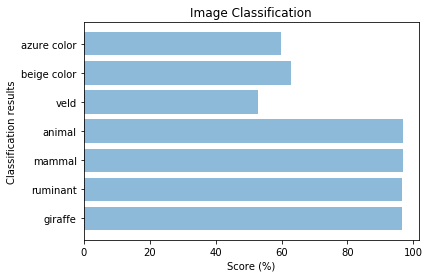

In [18]:
keyword = []
score = []

for i in img['images'][0]['classifiers'][0]['classes']:
    keyword.append(list(i.values())[0]) 
    score.append(list(i.values())[1]*100) # Multiply 100 to Convert 0.xx% to xx%

y_pos = np.arange(len(keyword))
plt.barh(y_pos, score, align = 'center', alpha = 0.5)
plt.yticks(y_pos, keyword)
plt.xlabel('Score (%)')
plt.ylabel('Classification results')
plt.title('Image Classification')

plt.show()